В задачах используйте реализацию метода k-nn из библиотеки sklearn:

from sklearn.neighbors import KNeighborsClassifier

Параметры, которые могут понадобиться, таковы: n_neighbors — число соседей; p — параметр в расстоянии Минковского (p = 1 отвечает манхэттенскому расстоянию, p = 2 — евклидову).

# Задача 1

Вам доступна таблица некоторых синтетических данных, на основании которых необходимо выполнить классификацию нового объекта, с помощью метода k-ближайших соседей.

id,X,Y,Class

1,31,58,1

2,43,64,0

3,66,15,1

4,11,85,1

5,33,31,0

6,99,52,0

7,85,52,1

8,67,23,0

9,67,88,1

10,57,76,1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('dataset_4.csv', sep=',', index_col='id')
df

,X,Y,Class
id,,,
1,31,58,1
2,43,64,0
3,66,15,1
4,11,85,1
5,33,31,0
6,99,52,0
7,85,52,1
8,67,23,0
9,67,88,1


In [ ]:
X = df[['X', 'Y']]
y = df['Class']

In [ ]:
x_pred = np.array([74, 92]).reshape(1, -1)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

Введите расстояние от нового объекта с координатами $(74, 92)$ до ближайшего соседа, используя евклидову метрику.

In [ ]:
print(round(neigh.kneighbors(x_pred)[0][0][0], 3))

8.062


Введите идентификаторы трех ближайших точек к $(74, 92)$ для евклидовой метрики.

In [ ]:
res = neigh.kneighbors(x_pred)[1][0]
for i in range(len(res)):
  print(res[i] + 1, end='')
  if i != len(res) - 1:
    print(',', end='')

9,10,7

Введите класс для нового объекта с координатами $(74, 92)$ при $k=3$ и евклидовой метрике.

In [ ]:
print(neigh.predict(x_pred)[0])

1


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3, p=1)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3, p=1)

Введите расстояние от нового объекта с координатами $(74,92)$ до ближайшего соседа, используя метрику городских кварталов (Манхеттенское расстояние).

In [ ]:
print(round(neigh.kneighbors(x_pred)[0][0][0], 3))

11.0


Введите идентификатры трех ближайших точек к $(74, 92)$ для метрики городских кварталов.

In [ ]:
res = neigh.kneighbors(x_pred)[1][0]
for i in range(len(res)):
  print(res[i] + 1, end='')
  if i != len(res) - 1:
    print(',', end='')

9,10,7

Введите класс для нового объекта с координатами $(74, 92)$ при $k=3$ и метрике городских кварталов.

In [ ]:
print(neigh.predict(x_pred)[0])

1


# Задание 2

Набор данных получен в результате переписи населения $1994$ года и содержит информацию о некотором количестве людей, проживающих в США. Задача состоит в том, чтобы предсказать, зарабатывает человек более $\$50$к в год или нет.

### Импорт библиотек и чтение набора данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt

Считайте набор данных в датафрейм. Исходя из описания признаков можно сразу избавиться от признаков <code>education</code> и <code>marital-status</code>. Удалите соответствующие колонки из набора данных.

In [ ]:
df = pd.read_csv('adult_data_train.csv', sep=',')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,HS-grad,9,Never-married,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,HS-grad,9,Never-married,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,Some-college,10,Divorced,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [ ]:
df = df.drop(['education', 'marital-status'], axis=1)
df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


Определите количество числовых и нечисловых признаков.

In [ ]:
value_qty = df.dtypes.value_counts()
value_qty

int64     7
object    6
dtype: int64

Введите количество нечисловых признаков.

In [ ]:
value_qty[1]

6

Постройте гистограмму распределения объектов по классам.

<Axes: >

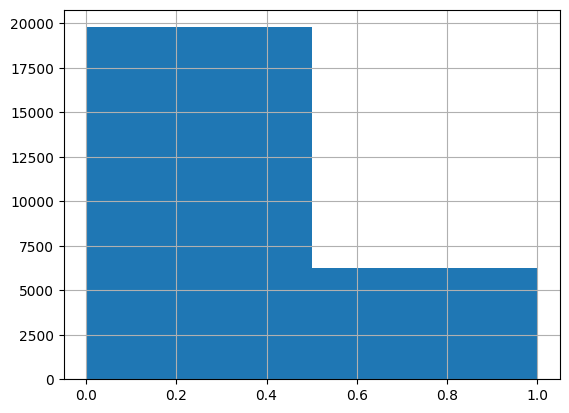

In [ ]:
df['label'].hist(bins=2)

Вычислите долю объектов класса $0$.

In [ ]:
zero_qty = df[df['label'] == 0].count()[0]
one_qty = df[df['label'] == 1].count()[0]
print(round(zero_qty / (zero_qty + one_qty),3))

0.759


## 1. Построение базовой модели

В качестве первого приближения имеет смысл построить модель классификации, опираясь исключительно на числовые признаки.

Отберите из набора данных только числовые признаки. При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки <code>test_size=0.2, random_state=11</code>. Используйте стратификацию по колонке <code>label</code>.

Вычислите выборочное среднее колонки <code>fnlwgt</code> тренировочного набора данных.

Обучите модель <code>KNeighborsClassifier()</code> с параметрами по умолчанию на тренировочных данных.

Как видно из предыдущего пункта, в наборе данных наблюдается явный дисбаланс представителей классов. Это следует учесть при оценке модели. Вычислите <code>f1_score</code> модели на тестовых данных (рекомендуем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">соответствующую функцию</a> с параметрами по умолчанию.

В качестве альтернативы можно использовать так называемый <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>classification_report()</code></a>, где приведены сразу несколько метрик (не стоит забывать про параметр <code>digits</code>).

In [ ]:
numerical_col = list(df.describe().columns)
df_num = df[numerical_col]

In [ ]:
df_num_train, df_num_test = train_test_split(df_num, test_size=0.2, random_state=11, stratify=df_num['label'])

Вычислите выборочное среднее колонки <code>fnlwgt</code> тренировочного набора данных.

In [ ]:
print(round(df_num_train['fnlwgt'].mean(), 3))

190043.759


In [ ]:
numerical_col.remove('label')

In [ ]:
X_train = df_num_train[numerical_col]
y_train = df_num_train['label']
X_test = df_num_test[numerical_col]
y_test = df_num_test['label']

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

Вычислите <code>f1_score()</code> для тестового набора данных.

In [ ]:
print(round(f1_score(y_test, y_pred), 3))

0.369


Стоит помнить, что KNN является метрическим классификатором, поэтому значения признаков перед обучением модели следует нормировать.

Обучите преобразование <code>MinMaxScaler()</code> на тренировочном наборе данных и примените его для тренировочных и тестовых данных.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Вычислите выборочное среднее колонки <code>fnlwgt</code> полученного тренировочного набора данных.

In [ ]:
print(round(X_train_scaled['fnlwgt'].mean(), 3))

0.121


Заново обучите и оцените модель на преобразованных данных.

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_scaled, y_train)
y_pred = neigh.predict(X_test_scaled)

Вычислите <code>f1_score()</code> модели.

In [ ]:
print(round(f1_score(y_test, y_pred), 3))

0.509


## 2. Работа с нечисловыми признаками

### Визуализация

Для дальнейшего улучшения качества модели имеет смысл задействовать нечисловые признаки исходного датасета (без колонок <code>education</code> и <code>marital-status</code>).

Постройте гистограммы, иллюстрирующие частоту того или иного значения по каждому нечисловому признаку, например, при помощи <code>sns.barplot()</code>.

In [ ]:
cat_columns = list(df.select_dtypes(['object']).columns)
len(cat_columns)

6

[]

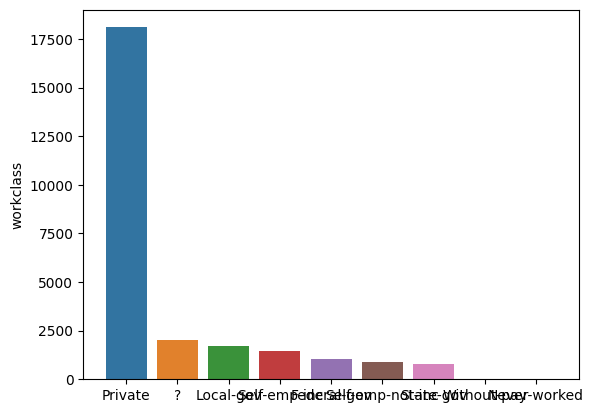

In [ ]:
ax = sns.barplot(x=df[cat_columns[0]].unique(),
    y=df[cat_columns[0]].value_counts())
ax.plot()

[]

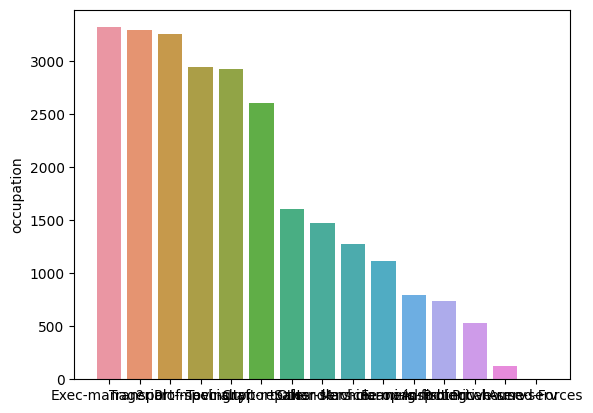

In [ ]:
ax = sns.barplot(x=df[cat_columns[1]].unique(),
    y=df[cat_columns[1]].value_counts())
ax.plot()

[]

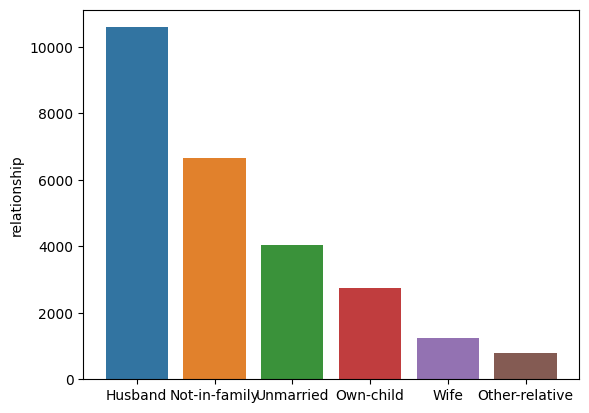

In [ ]:
ax = sns.barplot(x=df[cat_columns[2]].unique(),
    y=df[cat_columns[2]].value_counts())
ax.plot()

[]

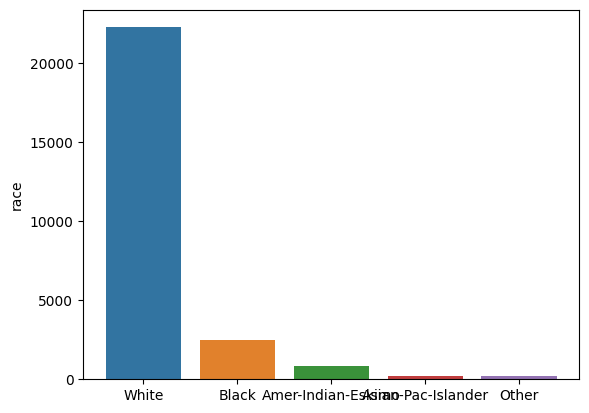

In [ ]:
ax = sns.barplot(x=df[cat_columns[3]].unique(),
    y=df[cat_columns[3]].value_counts())
ax.plot()

[]

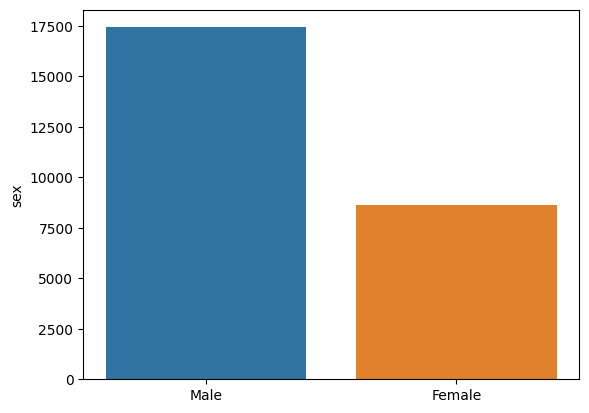

In [ ]:
ax = sns.barplot(x=df[cat_columns[4]].unique(),
    y=df[cat_columns[4]].value_counts())
ax.plot()

[]

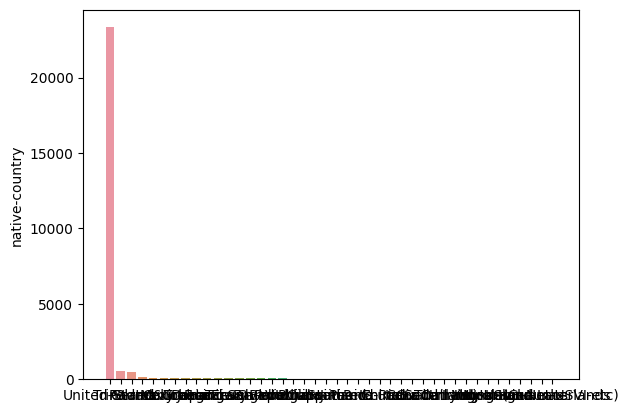

In [ ]:
ax = sns.barplot(x=df[cat_columns[5]].unique(),
    y=df[cat_columns[5]].value_counts())
ax.plot()

### Удаление пропущенных значений

Определите число строк исходного набора данных (без колонок <code>education</code> и <code>marital-status</code>), в которых присутствует хотя бы одно пропущенное значение.

In [ ]:
df_nan = df.replace("?", None)
len(df_nan[df_nan.isna().any(axis=1)])

1914

Удалите строки, содеражащие пропуски. Произведите <code>one-hot</code> кодировние нечисловых признаков, например, с помощью <code>pd.get_dummies(drop_first=True)</code>.

In [ ]:
df_nan = df_nan.dropna()

In [ ]:
df_one_hot = pd.get_dummies(df_nan, drop_first=True)

In [ ]:
df_one_hot

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,43,101950,14,0,0,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,40,24763,10,6849,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,24,113936,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,51,237630,9,7298,0,50,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26044,39,421633,10,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26045,55,82098,9,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26046,26,50053,13,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Введите число полученных признаков.

In [ ]:
len(df_one_hot.columns) - 1  # не учитываем label

75

Обучите модель классификации аналогично тому, как это было проделано для базовой модели. Вычислите <code>f1_score()</code> модели.

In [ ]:
df_train, df_test = train_test_split(df_one_hot, test_size=0.2, random_state=11, stratify=df_one_hot['label'])

In [ ]:
col = list(df_train.columns)
col.remove('label')

In [ ]:
X_train = df_train[col]
y_train = df_train['label']
X_test = df_test[col]
y_test = df_test['label']

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_scaled, y_train)
y_pred = neigh.predict(X_test_scaled)

Вычислите <code>f1_score()</code> модели.

In [ ]:
print(round(f1_score(y_test, y_pred), 3))

0.623


### Заполнение пропущенных значений

Возможно точность еще повысится, если задействовать строки с пропущенными значениями. Используя исходный датасет (без колонок <code>education</code> и <code>marital-status</code>), заполните пропуски самым часто встречающимся значением в рамках столбца.

In [ ]:
df_nan = df.replace("?", None)

In [ ]:
for e in list(df_nan.columns):
  df_nan[e].fillna(df[e].mode()[0], inplace=True)

Далее по уже знакомому сценарию: <code>one-hot</code>, <code>split</code>, <code>scaling</code>, обучение и оценка.

In [ ]:
df_one_hot = pd.get_dummies(df_nan, drop_first=True)

In [ ]:
df_train, df_test = train_test_split(df_one_hot, test_size=0.2, random_state=11, stratify=df_one_hot['label'])

In [ ]:
col = list(df_train.columns)
col.remove('label')

In [ ]:
X_train = df_train[col]
y_train = df_train['label']
X_test = df_test[col]
y_test = df_test['label']

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_scaled, y_train)
y_pred = neigh.predict(X_test_scaled)

Вычислите <code>f1_score()</code> модели.

In [ ]:
print(round(f1_score(y_test, y_pred), 3))

0.614
